In [1]:
import copy
import random
import time
from __future__ import print_function
from itertools import combinations, permutations  
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [2]:
# p=np.array([[15,0,0,0,21,0,0,7],
#             [0,18,0,25,0,0,0,5], 
#             [0,0,17,0,0,22,10,0],
#             [20,0,0,0,0,20,8,0]])

# r=np.array([[1,2,3,4,5,6,7,8],
#             [1,2,3,4,5,6,7,8], 
#             [1,2,3,4,5,6,7,8],
#             [1,2,3,4,5,6,7,8]])
# r = np.array([[7, 9, 0, 6, 4, 8, 2, 5, 1, 3], [6, 8, 3, 0, 1, 4, 5, 9, 2, 7], [1, 3, 5, 4, 0, 2, 6, 8, 9, 7],
#               [1, 7, 4, 6, 5, 0, 8, 3, 9, 2], [7, 2, 8, 5, 1, 6, 3, 0, 9, 4], [8, 0, 4, 5, 9, 1, 7, 6, 3, 2],
#               [6, 2, 8, 1, 9, 4, 7, 0, 5, 3], [8, 7, 5, 3, 2, 4, 9, 1, 0, 6], [4, 0, 9, 5, 7, 3, 2, 8, 6, 1],
#               [9, 0, 3, 8, 1, 6, 2, 5, 4, 7], [7, 3, 4, 5, 2, 0, 6, 9, 1, 8], [0, 3, 2, 7, 8, 5, 9, 1, 6, 4],
#               [9, 1, 3, 6, 2, 8, 7, 0, 5, 4], [4, 2, 5, 6, 8, 7, 3, 1, 0, 9], [2, 5, 9, 8, 0, 6, 3, 7, 1, 4]])
# p = np.array([[8, 75, 72, 74, 30, 43, 38, 98, 26, 19],[19, 73, 43, 23, 85, 39, 13, 26, 67, 9],[50, 93, 80, 7, 55, 61, 57, 72, 42, 46],
#               [68, 43, 99, 60, 68, 91, 11, 96, 11, 2],[84, 34, 40, 7, 70, 74, 12, 43, 69, 30],[60, 49, 59, 72, 63, 69, 99, 45, 27, 9],
#               [71, 91, 65, 90, 98, 8, 50, 75, 37, 17],[62, 90, 98, 31, 91, 38, 72, 9, 72, 49],[35, 39, 74, 25, 47, 52,63, 21, 35, 80],
#               [58, 5, 50, 52, 88, 20, 68, 24, 53, 57],[99, 91, 33, 19, 18, 38, 24, 35, 49, 9],[68, 60,77, 10, 60, 15, 72, 18, 90, 18],
#               [79, 60, 56, 91, 40, 86, 72, 80, 89,51],[10, 92, 23, 46, 40, 72, 6, 23, 95, 34],[24, 29, 49, 55, 47, 77, 77, 8, 28, 48]])
r = np.array([[1, 5, 2, 3, 4],
              [3, 5, 1, 4, 2],
              [5, 1, 3, 4, 2]])
p = np.array([[18, 46, 14, 26, 17],
              [16, 41, 11, 34, 37],
              [41, 38, 40, 34, 23]])


pt_tmp = p
ms_tmp = r
print("pt_tmp=",pt_tmp)
print("ms_tmp=",ms_tmp)

pt_tmp= [[18 46 14 26 17]
 [16 41 11 34 37]
 [41 38 40 34 23]]
ms_tmp= [[1 5 2 3 4]
 [3 5 1 4 2]
 [5 1 3 4 2]]


In [3]:

dfshape=pt_tmp.shape
num_mc=dfshape[1] # number of machines
num_job=dfshape[0] # number of jobs
num_gene=num_mc*num_job # number of genes in a chromosome
pt=pt_tmp
ms=ms_tmp
# raw_input is used in python 2
population_size = 30
crossover_rate = 0.8
mutation_rate = 0.2
mutation_selection_rate = 0.2
num_mutation_jobs = int(round(num_gene * mutation_selection_rate))
num_iteration = 2000
    
start_time = time.time()

'''==================== main code ==============================='''
'''----- generate initial population -----'''
random.seed(30)
np.random.seed(30)
Tbest=999999999999999
best_list,best_obj=[],[]
population_list=[]
makespan_record=[]
for i in range(population_size):
    nxm_random_num=list(np.random.permutation(num_gene)) # generate a random permutation of 0 to num_job*num_mc-1
    population_list.append(nxm_random_num) # add to the population_list
    for j in range(num_gene):
        population_list[i][j]=population_list[i][j]%num_job # convert to job number format, every job appears m times
        
for n in range(num_iteration):
    Tbest_now=99999999999           
   
    '''-------- two point crossover --------'''
    parent_list=copy.deepcopy(population_list)
    offspring_list=copy.deepcopy(population_list)
    S=list(np.random.permutation(population_size)) # generate a random sequence to select the parent chromosome to crossover
    
    for m in range(int(population_size/2)):
        crossover_prob=np.random.rand()
        if crossover_rate>=crossover_prob:
            parent_1= population_list[S[2*m]][:]
            parent_2= population_list[S[2*m+1]][:]
            child_1=parent_1[:]
            child_2=parent_2[:]
            cutpoint=list(np.random.choice(num_gene, 2, replace=False))
            cutpoint.sort()
        
            child_1[cutpoint[0]:cutpoint[1]]=parent_2[cutpoint[0]:cutpoint[1]]
            child_2[cutpoint[0]:cutpoint[1]]=parent_1[cutpoint[0]:cutpoint[1]]
            offspring_list[S[2*m]]=child_1[:]
            offspring_list[S[2*m+1]]=child_2[:]
        
    
    '''----------repairment-------------'''
    for m in range(population_size):
        job_count={}
        larger,less=[],[] # 'larger' record jobs appear in the chromosome more than m times, and 'less' records less than m times.
        for i in range(num_job):
            if i in offspring_list[m]:
                count=offspring_list[m].count(i)
                pos=offspring_list[m].index(i)
                job_count[i]=[count,pos] # store the above two values to the job_count dictionary
            else:
                count=0
                job_count[i]=[count,0]
            if count>num_mc:
                larger.append(i)
            elif count<num_mc:
                less.append(i)
                
        for k in range(len(larger)):
            chg_job=larger[k]
            while job_count[chg_job][0]>num_mc:
                for d in range(len(less)):
                    if job_count[less[d]][0]<num_mc:                    
                        offspring_list[m][job_count[chg_job][1]]=less[d]
                        job_count[chg_job][1]=offspring_list[m].index(chg_job)
                        job_count[chg_job][0]=job_count[chg_job][0]-1
                        job_count[less[d]][0]=job_count[less[d]][0]+1                    
                    if job_count[chg_job][0]==num_mc:
                        break     
    
    '''--------mutatuon--------'''   
    for m in range(len(offspring_list)):
        mutation_prob=np.random.rand()
        if mutation_rate >= mutation_prob:
            m_chg=list(np.random.choice(num_gene, num_mutation_jobs, replace=False)) # chooses the position to mutation
            t_value_last=offspring_list[m][m_chg[0]] # save the value which is on the first mutation position
            for i in range(num_mutation_jobs-1):
                offspring_list[m][m_chg[i]]=offspring_list[m][m_chg[i+1]] # displacement
            
            offspring_list[m][m_chg[num_mutation_jobs-1]]=t_value_last # move the value of the first mutation position to the last mutation position
  
    
    '''--------fitness value(calculate makespan)-------------'''
    total_chromosome=copy.deepcopy(parent_list)+copy.deepcopy(offspring_list) # parent and offspring chromosomes combination
    chrom_fitness,chrom_fit=[],[]
    total_fitness=0
    for m in range(population_size*2):
        j_keys=[j for j in range(num_job)]
        key_count={key:0 for key in j_keys}
        j_count={key:0 for key in j_keys}
        m_keys=[j+1 for j in range(num_mc)]
        m_count={key:0 for key in m_keys}
        
        for i in total_chromosome[m]:
            gen_t=int(pt[i][key_count[i]])
            gen_m=int(ms[i][key_count[i]])
            j_count[i]=j_count[i]+gen_t
            m_count[gen_m]=m_count[gen_m]+gen_t
            
            if m_count[gen_m]<j_count[i]:
                m_count[gen_m]=j_count[i]
            elif m_count[gen_m]>j_count[i]:
                j_count[i]=m_count[gen_m]
            
            key_count[i]=key_count[i]+1
    
        makespan=max(j_count.values())
        chrom_fitness.append(1/makespan)
        chrom_fit.append(makespan)
        total_fitness=total_fitness+chrom_fitness[m]

    
    '''----------selection(roulette wheel approach)----------'''
    pk,qk=[],[]
    
    for i in range(population_size*2):
        pk.append(chrom_fitness[i]/total_fitness)
    for i in range(population_size*2):
        cumulative=0
        for j in range(0,i+1):
            cumulative=cumulative+pk[j]
        qk.append(cumulative)
    
    selection_rand=[np.random.rand() for i in range(population_size)]
    
    for i in range(population_size):
        if selection_rand[i]<=qk[0]:
            population_list[i]=copy.deepcopy(total_chromosome[0])
        else:
            for j in range(0,population_size*2-1):
                if selection_rand[i]>qk[j] and selection_rand[i]<=qk[j+1]:
                    population_list[i]=copy.deepcopy(total_chromosome[j+1])
                    break
    '''----------comparison----------'''
    for i in range(population_size*2):
        if chrom_fit[i]<Tbest_now:
            Tbest_now=chrom_fit[i]
            sequence_now=copy.deepcopy(total_chromosome[i])
    if Tbest_now<=Tbest:
        Tbest=Tbest_now
        sequence_best=copy.deepcopy(sequence_now)
        
    makespan_record.append(Tbest)
    


In [4]:
print("m:",m)
print("n:",n)
print("optimal sequence", sequence_best)
print("optimal value:%f" % Tbest)
print('the elapsed time:%s' % (time.time() - start_time))
print('makespan_record:',len(makespan_record))

m: 59
n: 1999
optimal sequence [1, 2, 0, 2, 1, 0, 0, 1, 1, 2, 2, 0, 1, 2, 0]
optimal value:202.000000
the elapsed time:7.409002304077148
makespan_record: 2000


In [5]:
#print(makespan_record)
len(sequence_best)
num_mc

5

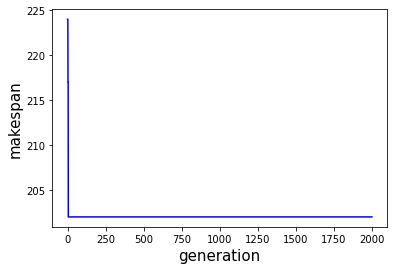

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot([i for i in range(len(makespan_record))],makespan_record,'b')
plt.ylabel('makespan',fontsize=15)
plt.xlabel('generation',fontsize=15)
plt.show()

In [7]:
# num_mc=5
# num_job=3
# m=59
# n=1999
# sequence_best=[1, 2, 0, 2, 1, 1, 1, 0, 2, 0, 1, 2, 0, 0, 2]

In [8]:
# ms = np.array([[1, 5, 2, 3, 4],
#               [3, 5, 1, 4, 2],
#               [5, 1, 3, 4, 2]])
# pt = np.array([[18, 46, 14, 26, 17],
#               [16, 41, 11, 34, 37],
#               [41, 38, 40, 34, 23]])



In [9]:
x = np.zeros((m, n, 2), dtype=int)
x.shape

(59, 1999, 2)

In [10]:
h = np.zeros((m, n), dtype=int)
h.shape

(59, 1999)

In [11]:
e = np.zeros((m,n), dtype=int)
e.shape

(59, 1999)

In [12]:
m_keys = [j + 1 for j in range(num_mc)]
m_keys

[1, 2, 3, 4, 5]

In [13]:
j_keys = [j for j in range(num_job)]
j_keys

[0, 1, 2]

In [14]:
key_count = {key: 0 for key in j_keys}
key_count

{0: 0, 1: 0, 2: 0}

In [15]:
j_count = {key: 0 for key in j_keys}
j_count

{0: 0, 1: 0, 2: 0}

In [16]:
m_count = {key: 0 for key in m_keys}
m_count

{1: 0, 2: 0, 3: 0, 4: 0, 5: 0}

In [17]:
j_record = {}


In [18]:
x = np.zeros((m, n, 2), dtype=int)
h = np.zeros((m, n), dtype=int)
e = np.zeros((m, n), dtype=int)

m_keys = [j + 1 for j in range(num_mc)]
j_keys = [j for j in range(num_job)]
key_count = {key: 0 for key in j_keys}
j_count = {key: 0 for key in j_keys}
m_count = {key: 0 for key in m_keys}
j_record = {}
for i in sequence_best:
    gen_t = int(pt[i][key_count[i]])  # time
    gen_m = int(ms[i][key_count[i]])  # order
    j_count[i] = j_count[i] + gen_t  # time of job
    m_count[gen_m] = m_count[gen_m] + gen_t  # time of machine

    if m_count[gen_m] < j_count[i]:
        m_count[gen_m] = j_count[i]
    elif m_count[gen_m] > j_count[i]:
        j_count[i] = m_count[gen_m]

    # convert seconds to hours, minutes and seconds
    start_time = int(j_count[i] - pt[i][int(key_count[i])])
    end_time = int(j_count[i])

    j_record[(i, gen_m)] = [start_time, end_time, key_count[i]]

    key_count[i] = key_count[i] + 1

df = []
for m in m_keys:
    for j in j_keys:
        list_of_start = [j_record[(q, m)][0] for q in j_keys]
        list_of_start.sort()
        order = list_of_start.index(j_record[(j, m)][0])
        h[m - 1, order] = j_record[(j, m)][0]
        e[m - 1, order] = j_record[(j, m)][1]
        x[m - 1, order, 0] = j
        x[m - 1, order, 1] = j_record[(j, m)][2]
        df.append(dict(Task='Machine %s' % (m), Start='2018-07-14 %s' % (str(j_record[(j, m)][0])), Finish='2018-07-14 %s' % (str(j_record[(j, m)][1])), Resource='Job %s' % (j + 1)))
        start=h
        end=e

In [19]:
h

array([[  0,  41,  82, ...,   0,   0,   0],
       [128, 142, 179, ...,   0,   0,   0],
       [  0,  79, 142, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]])

In [20]:
x[m - 1, order, 0]

2

In [21]:
e

array([[ 18,  79,  93, ...,   0,   0,   0],
       [142, 179, 202, ...,   0,   0,   0],
       [ 16, 119, 168, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]])

In [22]:
x

array([[[0, 0],
        [2, 1],
        [1, 2],
        ...,
        [0, 0],
        [0, 0],
        [0, 0]],

       [[0, 2],
        [1, 4],
        [2, 4],
        ...,
        [0, 0],
        [0, 0],
        [0, 0]],

       [[1, 0],
        [2, 2],
        [0, 3],
        ...,
        [0, 0],
        [0, 0],
        [0, 0]],

       ...,

       [[0, 0],
        [0, 0],
        [0, 0],
        ...,
        [0, 0],
        [0, 0],
        [0, 0]],

       [[0, 0],
        [0, 0],
        [0, 0],
        ...,
        [0, 0],
        [0, 0],
        [0, 0]],

       [[0, 0],
        [0, 0],
        [0, 0],
        ...,
        [0, 0],
        [0, 0],
        [0, 0]]])

In [23]:
df

[{'Task': 'Machine 1',
  'Start': '2018-07-14 0',
  'Finish': '2018-07-14 18',
  'Resource': 'Job 1'},
 {'Task': 'Machine 1',
  'Start': '2018-07-14 82',
  'Finish': '2018-07-14 93',
  'Resource': 'Job 2'},
 {'Task': 'Machine 1',
  'Start': '2018-07-14 41',
  'Finish': '2018-07-14 79',
  'Resource': 'Job 3'},
 {'Task': 'Machine 2',
  'Start': '2018-07-14 128',
  'Finish': '2018-07-14 142',
  'Resource': 'Job 1'},
 {'Task': 'Machine 2',
  'Start': '2018-07-14 142',
  'Finish': '2018-07-14 179',
  'Resource': 'Job 2'},
 {'Task': 'Machine 2',
  'Start': '2018-07-14 179',
  'Finish': '2018-07-14 202',
  'Resource': 'Job 3'},
 {'Task': 'Machine 3',
  'Start': '2018-07-14 142',
  'Finish': '2018-07-14 168',
  'Resource': 'Job 1'},
 {'Task': 'Machine 3',
  'Start': '2018-07-14 0',
  'Finish': '2018-07-14 16',
  'Resource': 'Job 2'},
 {'Task': 'Machine 3',
  'Start': '2018-07-14 79',
  'Finish': '2018-07-14 119',
  'Resource': 'Job 3'},
 {'Task': 'Machine 4',
  'Start': '2018-07-14 168',
  'Fi

In [24]:
def PlotRec(mPoint1, mPoint2, mText):
    vPoint = np.zeros((4, 2))
    vPoint[0, :] = [mPoint1, mText - 0.8]
    vPoint[1, :] = [mPoint2, mText - 0.8]
    vPoint[2, :] = [mPoint1, mText]
    vPoint[3, :] = [mPoint2, mText]
    plt.plot([vPoint[0, 0], vPoint[1, 0]], [vPoint[0, 1], vPoint[1, 1]], 'k')
    # hold on
    plt.plot([vPoint[0, 0], vPoint[2, 0]], [vPoint[0, 1], vPoint[2, 1]], 'k')
    plt.plot([vPoint[1, 0], vPoint[3, 0]], [vPoint[1, 1], vPoint[3, 1]], 'k')
    plt.plot([vPoint[2, 0], vPoint[3, 0]], [vPoint[2, 1], vPoint[3, 1]], 'k')

0


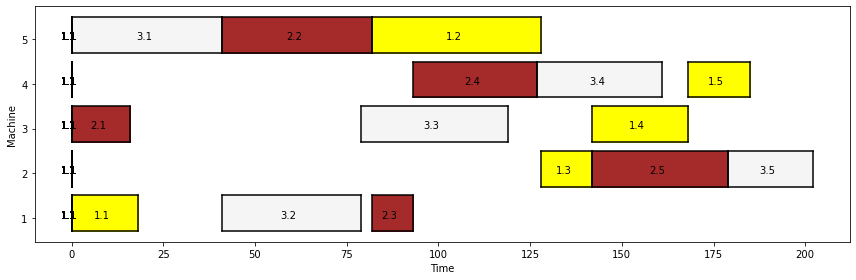

In [25]:
colorbox = ['yellow', 'brown', 'whitesmoke', 'orange', 'lightyellow','khaki', 'silver', 'pink', 'lightgreen', 'grey', 'r']

for i in range(100):
    colorArr = ['1', '2', '3', '4', '5', '6', '7',
                        '8', '9', 'A', 'B', 'C', 'D', 'E', 'F']
    color = ""
    for i in range(6):
        color += colorArr[random.randint(0, 14)]
    colorbox.append("#" + color)

zzl = plt.figure(figsize=(12, 4))
for i in range(m):
    # number_of_mashine:
    for j in range(n):
        # number_of_job:

        mPoint1 = h[i, j]
        mPoint2 = e[i, j]
        mText = i + 1.5
        PlotRec(mPoint1, mPoint2, mText)          ##...................... PlotRec
        Word = str(x[i, j, 0] + 1) + '.' + str(x[i, j, 1] + 1)
        # hold on

        x1 = mPoint1
        y1 = mText - 0.8
        x2 = mPoint2
        y2 = mText - 0.8
        x3 = mPoint2
        y3 = mText
        x4 = mPoint1
        y4 = mText
        plt.fill([x1, x2, x3, x4], [y1, y2, y3, y4],color=colorbox[x[i, j, 0]])

        plt.text(0.5 * mPoint1 + 0.5 * mPoint2 - 3, mText - 0.5, Word)
print(x1)

plt.xlabel('Time')
plt.ylabel('Machine')
plt.tight_layout()
plt.savefig('./results/out.png', dpi=700)